<a href="https://colab.research.google.com/github/LEEHYUNJI94/Python/blob/master/Open%20CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Open CV 기본 사용법**


> CoLab에서 파일 업로드
*   파일은 주기적으로 초기화되기 때문에, 계속 업로드 필요


In [35]:
from google.colab import files
uploaded = files.upload()

Saving sunflower.jpg to sunflower (1).jpg




> OpenCV의 기본적인 함수¶
*   cv2.imread(file_name, flag)
*   cv2.imshow(title, image)
*   cv2.cvtColor(image, flag)


> Matplotlib사용으로 이미지 동작시킬 수 있음 
*   OpenCV는 BGR을 기준, Matplotlib는 RGB 기준







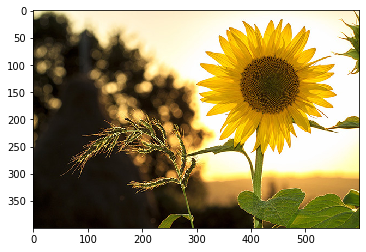

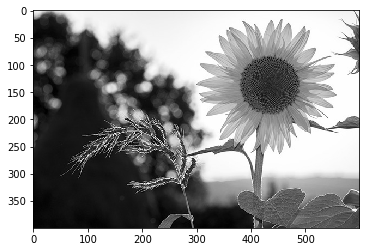

In [36]:
import cv2
import matplotlib.pyplot as plt

img_basic = cv2.imread('sunflower.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

img_basic = cv2.cvtColor(img_basic, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_GRAY2RGB))
plt.show()

### OpenCv이미지 연산
*   픽셀 사이즈 
*   픽셀값 조회시 shape 픽셀 범위 내에서만 조회가능 (6 line)






In [37]:
import cv2
img_basic1 =cv2.imread('sunflower.jpg')
print(img_basic1.shape)  #픽셀 수 확인 (높이,너비)
print(img_basic1.size)

px1 =img_basic1[100,200] #이미지numpy 객체의 특정 픽
print(px1[2])            #R 값만 출력하기

(400, 600, 3)
720000
[ 49  96 128]
128


### OPen CV를 활용한 특정 범위 픽셀 변경

*   time을 이용해 걸리는 시간 측정가능 -> time.time()
*  



--- 0.013889074325561523 seconds ---
--- 0.00027632713317871094 seconds ---


<function matplotlib.pyplot.show>

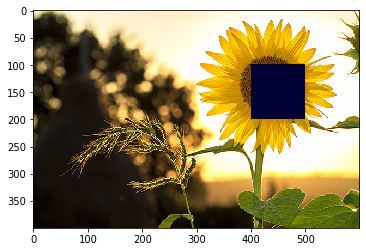

In [49]:
import cv2
import matplotlib.pyplot as plt
import time

img=cv2.imread("sunflower.jpg")

#####특정픽셀에 직접접근해 픽셀 변경-time consuming#####
time_start=time.time()
for i in range(100, 200):
    for j in range(400, 500):
        img[i, j] = [255, 255, 255]
print("--- %s seconds ---" % (time.time() - time_start))

#####슬라이싱을 이용한 픽셀변경-시간절약
time_start=time.time()
img[100:200, 400:500] = [50, 0, 0]  #[높이,너비]

print("--- %s seconds ---" % (time.time() - time_start))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

### OpenCV를 활용한 ROI(Region of Interest: 관심 있는 영역) 추출

*   shape와 동일한 크기로 붙여넣기



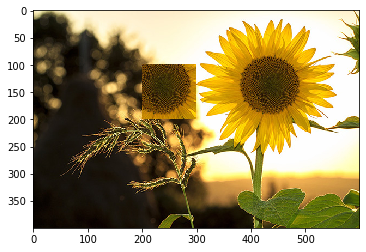

In [70]:
import cv2
import matplotlib.pyplot as plt

imgfortest=cv2.imread("sunflower.jpg")
imgforchco=cv2.imread("sunflower.jpg")

#####슬라이싱으로 ROI처리#####
Reason_of_In=imgfortest[100:200, 400:500]

#####ROI단위로 이미지 복사#####
imgfortest[100:200,200:300]=Reason_of_In  #[200-100:500-400]=[200-100.300-200] 같은 크기여야 ROI처리 후 복사가능

plt.imshow(cv2.cvtColor(imgfortest,cv2.COLOR_BGR2RGB))
plt.show()


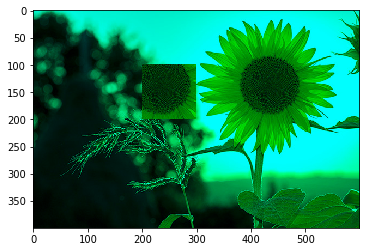

In [69]:
#####픽셀값바꾸기#####
imgfortest[:,:,2]=0 #모든 픽셀에 대해 인덱스 2 = R (cv2는 BGR 이기때문)
plt.imshow(cv2.cvtColor(imgfortest,cv2.COLOR_BGR2RGB))
plt.show()